In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv(r"C:\Users\K\Downloads\USL\USL Data Files\grains.csv")

In [63]:
df

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
data = df.drop(columns='target')

In [66]:
data

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [67]:
from sklearn.cluster import KMeans

In [68]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
scaled_data = pd.DataFrame(data=scaled_data,columns=data.columns)
scaled_data



,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [69]:
err=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=100)
    model = model.fit(scaled_data)
    err.append(model.inertia_)

In [70]:
err

[1470.0,
 659.1717544870407,
 430.6589731513006,
 371.3017212775421,
 327.9443660007668,
 290.78517945315167,
 262.1721422493413,
 240.17318129143857,
 225.7939292448222,
 207.08594457603718]

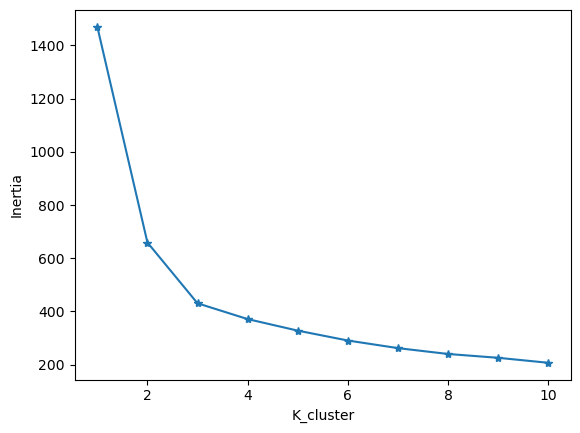

In [71]:
plt.plot(range(1,11),err,marker='*')
plt.xlabel('K_cluster')
plt.ylabel('Inertia')
plt.show()

In [72]:
a = model.cluster_centers_
a

array([[-0.28929194, -0.26041898, -0.05273029, -0.22556188, -0.25563533,
        -0.8284989 , -0.59665171],
       [ 1.74464599,  1.69055526,  0.81879081,  1.58597406,  1.64931787,
         1.07121867,  1.55471824],
       [-1.20113642, -1.08239596, -1.93203471, -0.82030044, -1.46905166,
         0.94930739, -0.49973796],
       [ 1.51259714,  1.59615063,  0.08440404,  1.78902198,  1.1876226 ,
        -0.4690836 ,  1.75625003],
       [ 0.5863694 ,  0.6600514 ,  0.13662441,  0.65071439,  0.5217097 ,
         0.23651132,  0.74789137],
       [ 1.29462026,  1.20330014,  1.18128043,  1.05816501,  1.37520147,
        -0.59621138,  1.1186388 ],
       [-0.99352759, -0.98959211, -0.75845879, -0.91412395, -1.02855109,
         0.32490415, -0.6055573 ],
       [-0.78646041, -0.82840647, -0.13601373, -0.82715885, -0.6377073 ,
         1.91061842, -0.61749589],
       [ 0.13937804,  0.04660129,  1.07108564, -0.21399186,  0.46365316,
        -1.08800972, -0.59976766],
       [-0.72190654, -0.8805

In [73]:
model.labels_

array([0, 8, 8, 8, 8, 8, 0, 8, 4, 8, 4, 0, 9, 0, 0, 9, 9, 8, 8, 6, 0, 0,
       8, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 5, 0, 7, 0, 0, 9, 4,
       8, 0, 8, 8, 0, 0, 0, 4, 0, 0, 0, 0, 0, 8, 8, 0, 9, 9, 9, 6, 0, 9,
       0, 0, 0, 6, 4, 4, 4, 5, 4, 4, 4, 1, 1, 4, 4, 1, 1, 3, 3, 5, 5, 3,
       1, 1, 3, 5, 5, 1, 3, 4, 3, 3, 3, 3, 4, 5, 1, 3, 3, 5, 5, 4, 3, 5,
       5, 3, 5, 1, 1, 3, 5, 5, 5, 3, 1, 4, 4, 5, 8, 5, 3, 5, 3, 4, 5, 5,
       4, 4, 4, 8, 4, 4, 4, 4, 6, 7, 7, 7, 2, 2, 6, 6, 6, 2, 6, 2, 2, 2,
       6, 2, 6, 2, 2, 2, 6, 6, 6, 6, 7, 9, 6, 6, 2, 6, 2, 7, 6, 2, 2, 6,
       2, 2, 2, 0, 6, 6, 6, 6, 7, 2, 2, 2, 7, 6, 2, 6, 9, 2, 6, 9, 7, 9,
       6, 9, 7, 9, 6, 7, 6, 9, 6, 7, 6, 7])

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=100)
    model = model.fit(scaled_data)
    s_score = round(silhouette_score(scaled_data,model.labels_),2)
    print('silhouette_score for',i,'is', s_score)

silhouette_score for 2 is 0.47
silhouette_score for 3 is 0.4
silhouette_score for 4 is 0.33
silhouette_score for 5 is 0.28
silhouette_score for 6 is 0.27
silhouette_score for 7 is 0.29
silhouette_score for 8 is 0.26
silhouette_score for 9 is 0.26
silhouette_score for 10 is 0.25


In [76]:
data_copy = data.copy()

In [77]:
model = KMeans(n_clusters=3,random_state=100)
model = model.fit(scaled_data)
data_copy['labels'] = model.labels_


In [78]:
data_copy['labels'].value_counts()

1    72
2    71
0    67
Name: labels, dtype: int64

In [79]:
df['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [80]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

In [81]:
from scipy.spatial.distance import pdist

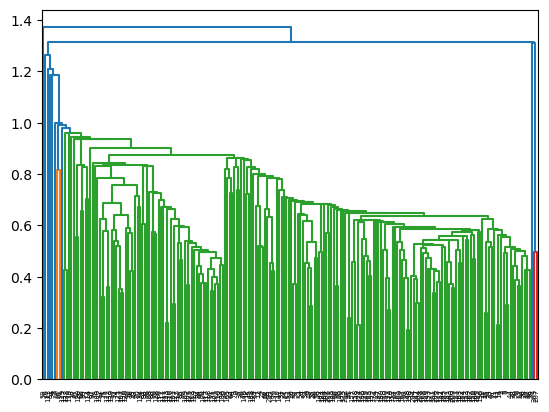

In [82]:
Z = linkage(scaled_data,method = 'single')
dendrogram(Z)
plt.show()

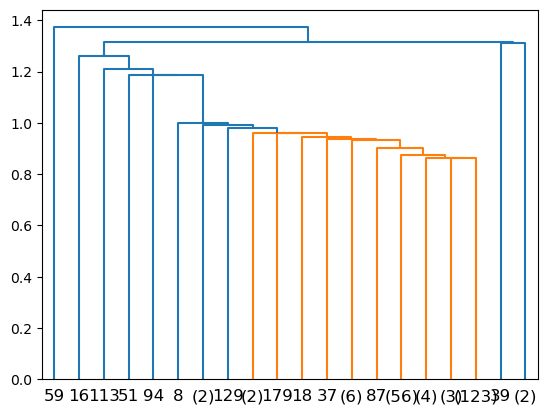

In [83]:
Z = linkage(scaled_data,method = 'single')
dendrogram(Z,truncate_mode= 'lastp' ,p=20)
plt.show()

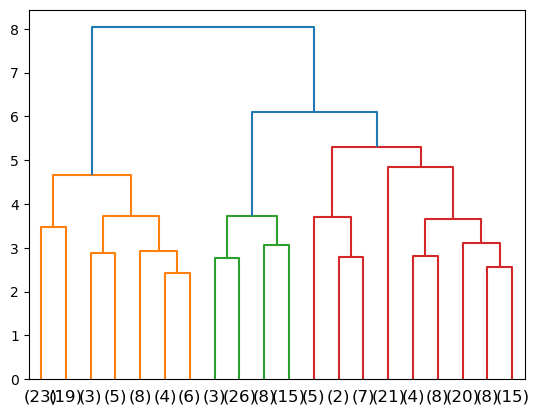

In [84]:
Z = linkage(scaled_data,method = 'complete')
dendrogram(Z,truncate_mode= 'lastp' ,p=20)
plt.show()

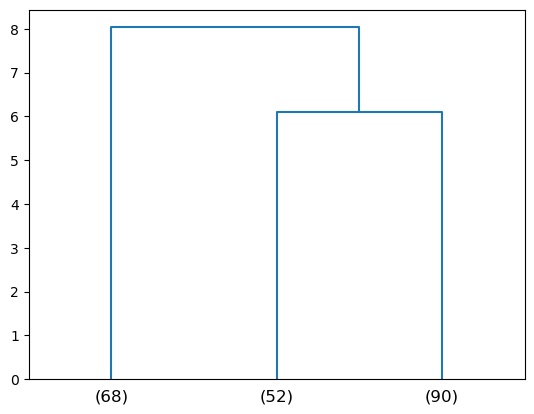

In [85]:
Z = linkage(scaled_data,method = 'complete')
dendrogram(Z,truncate_mode= 'lastp' ,p=3)
plt.show()

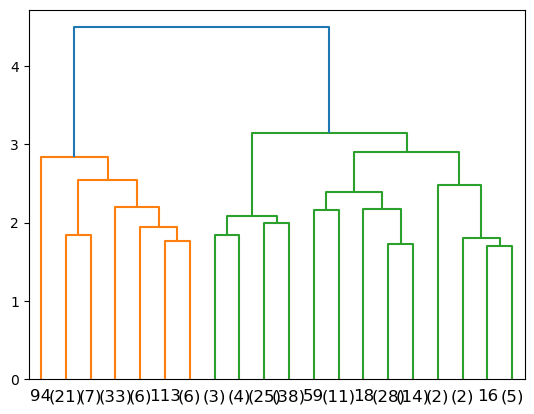

In [86]:
Z = linkage(scaled_data,method = 'average')
dendrogram(Z,truncate_mode= 'lastp' ,p=20)
plt.show()

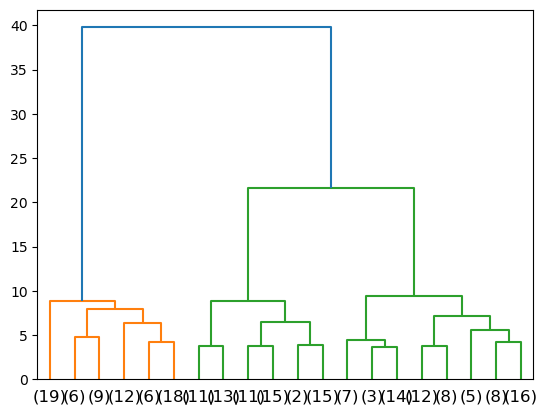

In [87]:
Z = linkage(scaled_data,method = 'ward')
dendrogram(Z,truncate_mode= 'lastp' ,p=20)
plt.show()


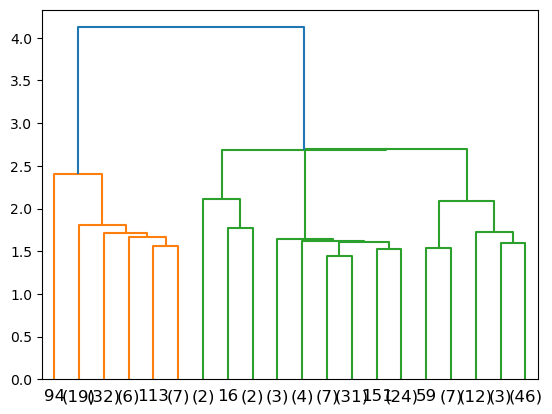

In [88]:
Z = linkage(scaled_data,method = 'centroid')
dendrogram(Z,truncate_mode= 'lastp' ,p=20)
plt.show()

after finding best linkage here we choose ward method,and cluster is equal to 3

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
agg = AgglomerativeClustering(n_clusters = 3 , linkage = 'ward')
agg.fit(scaled_data)

AgglomerativeClustering(n_clusters=3)

In [91]:
agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [92]:
data_copy1 = data.copy()

In [93]:
data_copy1['labels'] = agg.labels_

In [94]:
data_copy1['labels'].value_counts()

0    73
1    70
2    67
Name: labels, dtype: int64

In [95]:
data_copy1

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


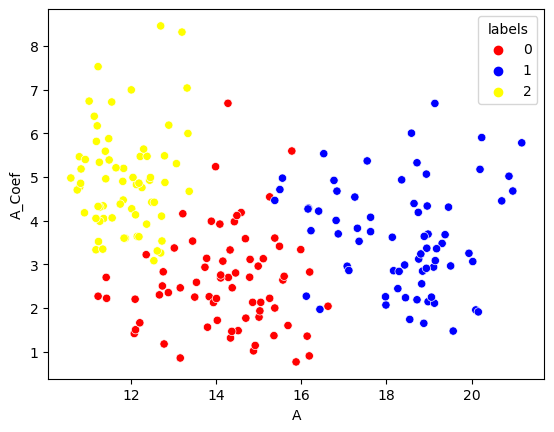

In [96]:
sns.scatterplot(data=data_copy1,x='A',y='A_Coef',hue='labels',palette=['red','blue','yellow'])
plt.show()

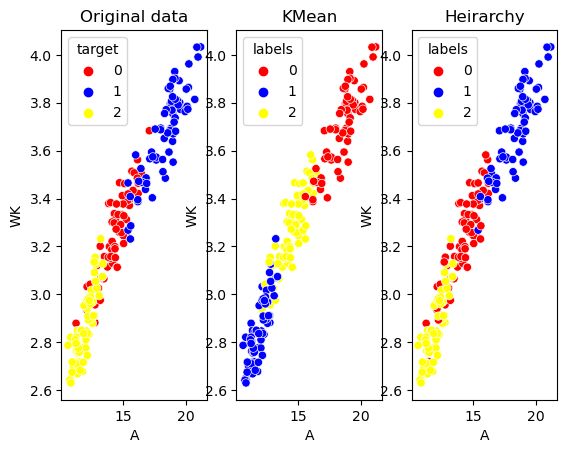

In [97]:
plt.subplot(1,3,1)
plt.title('Original data')
sns.scatterplot(data=df,x='A',y='WK',hue='target',palette=['red','blue','yellow'])

plt.subplot(1,3,2)
plt.title('KMean')
sns.scatterplot(data=data_copy,x='A',y='WK',hue='labels',palette=['red','blue','yellow'])

plt.subplot(1,3,3)
plt.title('Heirarchy')
sns.scatterplot(data=data_copy1,x='A',y='WK',hue='labels',palette=['red','blue','yellow'])
plt.show()

# Decision Tree Classfier 

In [98]:
data_copy.head() #based on K-Mean Algorithm

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [99]:
X = data_copy.drop(columns='labels')
y = data_copy['labels']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)


In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 7)
(63, 7)
(147,)
(63,)


In [103]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [104]:
DT = DecisionTreeClassifier(random_state = 1)
model = DT.fit(X_train,y_train)
model.score(X_train,y_train) #train_score

1.0

In [105]:
model.score(X_test,y_test) #test_score

0.9047619047619048

In [106]:
pred_test = model.predict(X_test) #pedicted_ytest

In [107]:
accuracy_score(y_test,pred_test)

0.9047619047619048

In [109]:
DT = DecisionTreeClassifier()
model = DT.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

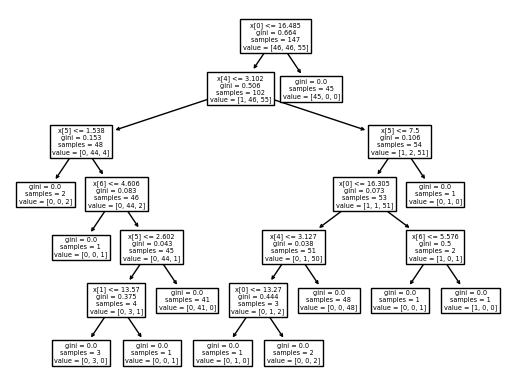

In [110]:
plot_tree(model)
plt.show()

In [111]:
model.feature_importances_

array([0.49475004, 0.01536371, 0.        , 0.        , 0.40090698,
       0.05957792, 0.02940135])

### Cophenetic Coefficent

In [113]:
from scipy.cluster.hierarchy import cophenet

In [114]:
from scipy.spatial.distance import pdist

In [116]:
method_list = ['single','complete','centroid','average','ward']

Cophenetic Coefficent of single is 0.4266838473609089


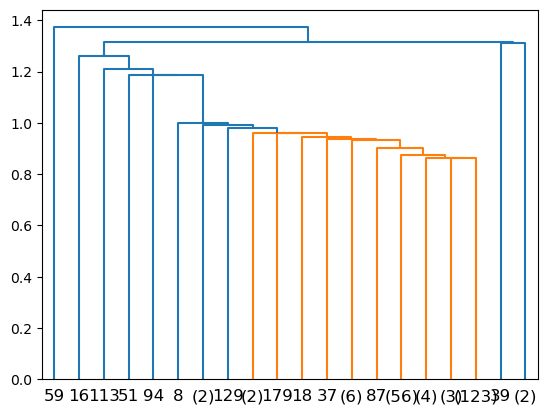

Cophenetic Coefficent of complete is 0.7129628799252149


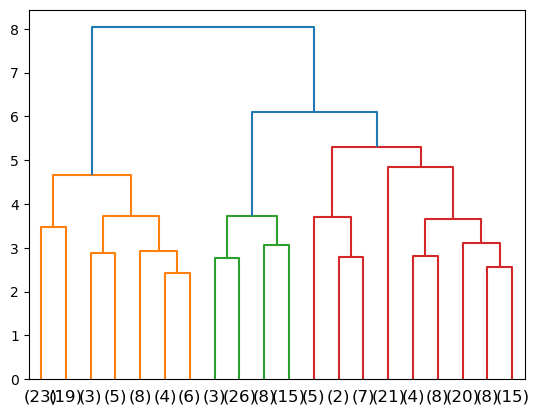

Cophenetic Coefficent of centroid is 0.7374128094649327


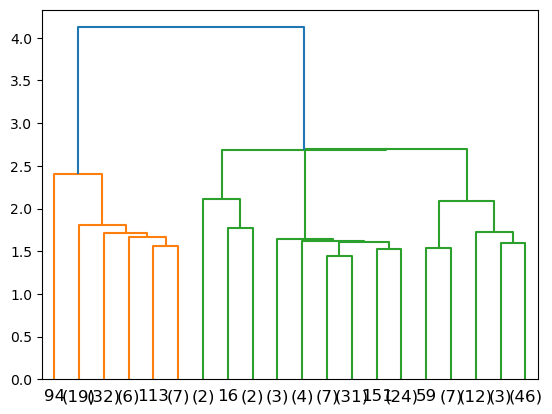

Cophenetic Coefficent of average is 0.7146889209200192


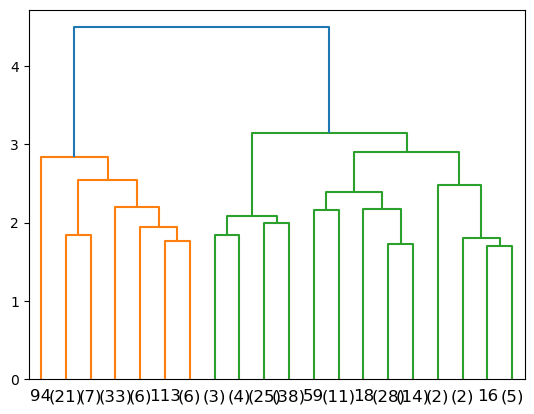

Cophenetic Coefficent of ward is 0.7285528540866004


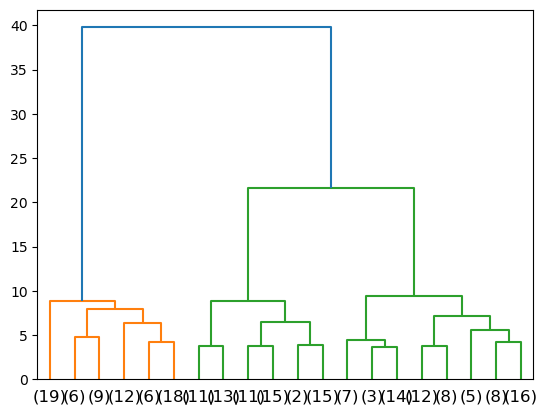

In [119]:
for metho in method_list:
    Z = linkage(scaled_data,method = metho)
    c,coph_dist = cophenet(Z,pdist(scaled_data))
    print('Cophenetic Coefficent of',metho,'is',c)
    dendrogram(Z,truncate_mode= 'lastp' ,p=20)
    plt.show()

#### DBSCAN

DBSCAN is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.

In [120]:
data = pd.read_csv(r"C:\Users\K\Downloads\USL\USL Data Files\db_data.csv")
data

,F1,F2,out
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,0
3,-0.774415,0.649314,0
4,-0.379833,0.952658,0
...,...,...,...
495,1.974937,0.188991,1
496,0.279537,-0.201197,1
497,1.918825,0.131525,1
498,0.068505,0.312760,1


In [122]:
df = data[['F1','F2']]

In [123]:
df

,F1,F2
0,1.047751,0.071995
1,0.020275,0.161049
2,-0.671793,0.750891
3,-0.774415,0.649314
4,-0.379833,0.952658
...,...,...
495,1.974937,0.188991
496,0.279537,-0.201197
497,1.918825,0.131525
498,0.068505,0.312760


In [125]:
model = KMeans(n_clusters = 2,random_state = 100)
model.fit(df)

KMeans(n_clusters=2, random_state=100)

In [126]:
df['labels']=model.labels_

In [127]:
df

,F1,F2,labels
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,1
3,-0.774415,0.649314,1
4,-0.379833,0.952658,1
...,...,...,...
495,1.974937,0.188991,0
496,0.279537,-0.201197,0
497,1.918825,0.131525,0
498,0.068505,0.312760,1


In [128]:
df['labels'].value_counts()

0    257
1    243
Name: labels, dtype: int64

In [129]:
data['out'].value_counts()

0    250
1    250
Name: out, dtype: int64

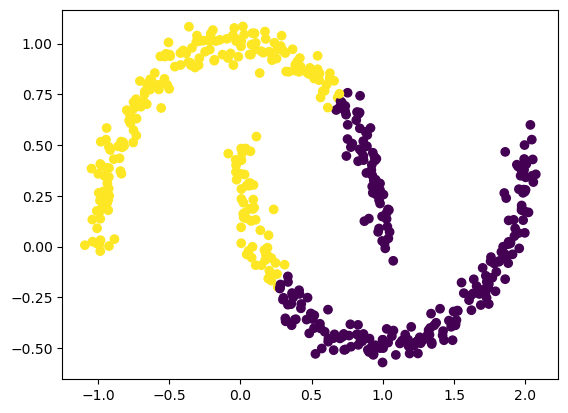

In [130]:
plt.scatter(data=df,x='F1',y='F2',c='labels')
plt.show()

In [132]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5)
db.fit(df.loc[:,['F1','F2']])
df['labeled_db'] = db.labels_
                

In [133]:
df

,F1,F2,labels,labeled_db
0,1.047751,0.071995,0,0
1,0.020275,0.161049,1,1
2,-0.671793,0.750891,1,0
3,-0.774415,0.649314,1,0
4,-0.379833,0.952658,1,0
...,...,...,...,...
495,1.974937,0.188991,0,1
496,0.279537,-0.201197,0,1
497,1.918825,0.131525,0,1
498,0.068505,0.312760,1,1


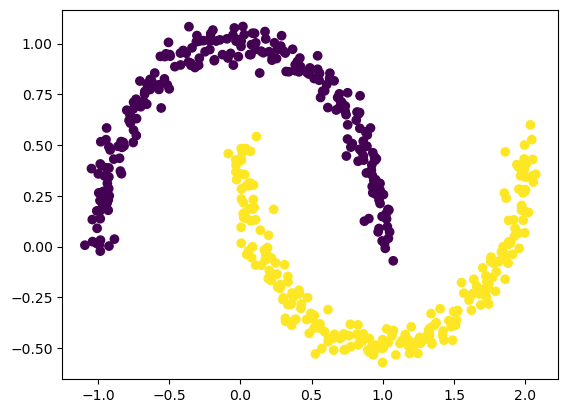

In [134]:
plt.scatter(data=df,x='F1',y='F2',c='labeled_db')
plt.show()

In [135]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1,min_samples=5)
db.fit(df.loc[:,['F1','F2']])
df['labeled_db_eps_0.1'] = db.labels_
                

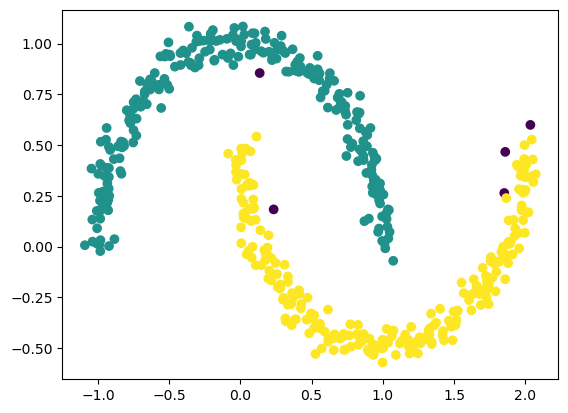

In [137]:
plt.scatter(data=df,x='F1',y='F2',c='labeled_db_eps_0.1')
plt.show()

In [ ]:
df['labels'].value_counts()